In [1]:
import osmnx as ox
import geopandas as gpd
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import contextily as cx
import pandas as pd

In [3]:
place_name = "Edinburgh, Scotland"
web_mercartor_crs = 3857

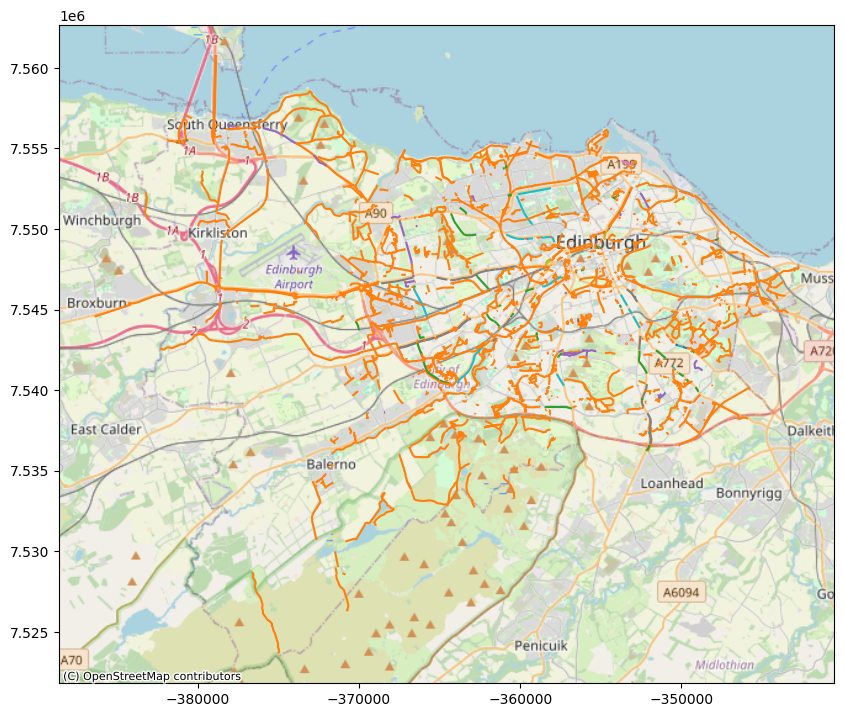

In [4]:
cycleways = ox.features.features_from_place(
    place_name,
    tags={"highway": "cycleway", "cycleway": True, "bicycle": ["yes", "designated"]},
).loc["way"]

cycleways["cycleway"] = cycleways["cycleway"].fillna("highway")
ax = cycleways.to_crs(web_mercartor_crs).plot(column="cycleway", cmap="tab10", figsize=(10, 10), legend=False)
cx.add_basemap(ax, crs=web_mercartor_crs, source=cx.providers.OpenStreetMap.Mapnik)

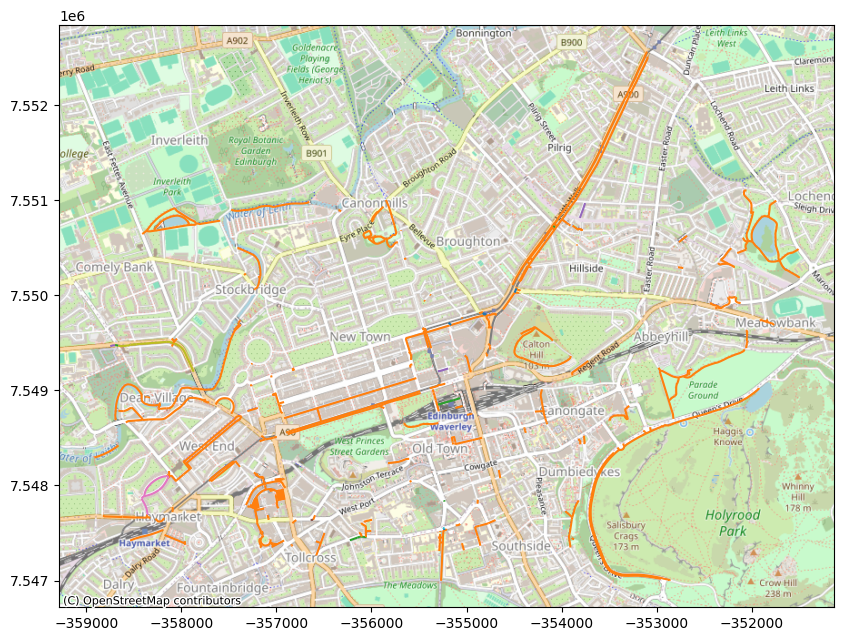

In [5]:
# filter the cycleways with a bounding box
west, south, east, north = -3.222382,55.944458,-3.158138,55.962190
ax = cycleways.cx[west:east, south:north].to_crs(web_mercartor_crs).plot(column="cycleway", cmap="tab10", figsize=(10, 10), legend=False)
cx.add_basemap(ax, crs=web_mercartor_crs, source=cx.providers.OpenStreetMap.Mapnik)

In [6]:
cycleways.cx[west:east, south:north].to_crs(web_mercartor_crs).name.value_counts().iloc[:20]

name
Water of Leith Walkway      11
Princes Street              10
Queensferry Road             7
West Approach Road           7
Waverley Bridge              5
Hawthornbank Lane            5
City Chambers Quadrangle     5
Belford Road                 4
Conference Square            4
Sibbald Walk                 4
High Street                  4
Lauriston Place              3
Grosvenor Crescent           3
Bishop's Walk                3
Gullan's Close               3
Braidwood Gate               3
Hopetoun Court               3
Marshall Street              3
Ann Terrace                  3
Lansdowne Crescent           3
Name: count, dtype: int64

In [6]:
cycleways.incline.value_counts()

incline
up      58
down    24
0%       2
yes      1
Name: count, dtype: int64

In [7]:
cycleways

geometry       highway  \
id                                                                            
2954015     LINESTRING (-3.09744 55.93423, -3.09774 55.934...       primary   
2956326     LINESTRING (-3.19952 55.95157, -3.19927 55.951...  unclassified   
2956327     LINESTRING (-3.20669 55.95199, -3.20646 55.952...      tertiary   
2956342      LINESTRING (-3.1435 55.92096, -3.14328 55.92092)       primary   
3017254     LINESTRING (-3.17843 55.93405, -3.17826 55.933...      tertiary   
...                                                       ...           ...   
1373662358  LINESTRING (-3.22961 55.95465, -3.22974 55.954...       primary   
1373662364  LINESTRING (-3.22222 55.95506, -3.22212 55.955...       primary   
1373662367  LINESTRING (-3.22267 55.95501, -3.22241 55.955...       primary   
1374528470  LINESTRING (-3.30341 55.95215, -3.30353 55.952...       footway   
1375077419  LINESTRING (-3.13448 55.91965, -3.13423 55.919...      cycleway   

                         name  ref       source direction traffic_signals  \
id                                                                          
2954015                   NaN   A1          NaN       NaN             NaN   
2956326        Princes Street  NaN  Bing;survey       NaN             NaN   
2956327         George Street  NaN  Bing;survey       NaN             NaN   
2956342     Old Dalkeith Road   A7         bing       NaN             NaN   
3017254     Ratcliffe Terrace  NaN          NaN       NaN             NaN   
...                       ...  ...          ...       ...             ...   
1373662358   Queensferry Road  A90          NaN       NaN             NaN   
1373662364   Queensferry Road  A90          NaN       NaN             NaN   
1373662367   Queensferry Road  A90          NaN       NaN             NaN   
1374528470                NaN  NaN          NaN       NaN             NaN   
1375077419                NaN  NaN          NaN       NaN             NaN   

           crossing crossing:markings crossing:island  ... emergency moped  \
id                                                     ...                   
2954015         NaN               NaN             NaN  ...       NaN   NaN   
2956326         NaN               NaN             NaN  ...       NaN   NaN   
2956327         NaN               NaN             NaN  ...       NaN   NaN   
2956342         NaN               NaN             NaN  ...       NaN   NaN   
3017254         NaN               NaN             NaN  ...       NaN   NaN   
...             ...               ...             ...  ...       ...   ...   
1373662358      NaN               NaN             NaN  ...       NaN   NaN   
1373662364      NaN               NaN             NaN  ...       NaN   NaN   
1373662367      NaN               NaN             NaN  ...       NaN   NaN   
1374528470      NaN               NaN             NaN  ...       NaN   NaN   
1375077419      NaN               NaN             NaN  ...       NaN   NaN   

           motorcycle:maxdisplacement parking:condition:both  \
id                                                             
2954015                           NaN                    NaN   
2956326                           NaN                    NaN   
2956327                           NaN                    NaN   
2956342                           NaN                    NaN   
3017254                           NaN                    NaN   
...                               ...                    ...   
1373662358                        NaN                    NaN   
1373662364                        NaN                    NaN   
1373662367                        NaN                    NaN   
1374528470                        NaN                    NaN   
1375077419                        NaN                    NaN   

           parking:lane:both:parallel check_date:cycleway:surface path  \
id                                                                       
2954015                    

In [7]:
cycleways["name_ref"] = cycleways["name"].fillna(cycleways["ref"])

In [16]:
concatenated_cycleways = pd.concat([
    cycleways[cycleways["name_ref"].isna()],
    cycleways.dissolve(by="name_ref", dropna=True, as_index=False),
])

In [8]:
cycleways["length_meters"] = cycleways.to_crs(cycleways.estimate_utm_crs()).geometry.length

In [10]:
with pd.option_context("display.max_rows", None, "display.max_columns", None):
    display(concatenated_cycleways.head().T)

3993982  \
geometry                     LINESTRING (-3.1661624 55.9399942, -3.1661734 ...   
highway                                                                service   
name                                                                       NaN   
ref                                                                        NaN   
source                                                                     NaN   
direction                                                                  NaN   
traffic_signals                                                            NaN   
crossing                                                                   NaN   
crossing:markings                                                          NaN   
crossing:island                                                            NaN   
description                                                                NaN   
tactile_paving                                                             NaN   
crossing_ref                                                               NaN   
bicycle                                                                    yes   
kerb                                                                       NaN   
button_operated                                                            NaN   
traffic_signals:sound                                                      NaN   
traffic_signals:vibration                                                  NaN   
cycleway                                                               highway   
traffic_signals:direction                                                  NaN   
junction                                                                   NaN   
mapillary                                                                  NaN   
survey:date                                                                NaN   
barrier                                                                    NaN   
foot                                                                       yes   
material                                                                   NaN   
maxwidth                                                                   NaN   
wheelchair                                                                 NaN   
note:mapillary                                                             NaN   
segregated                                                                 NaN   
traffic_calming                                                            NaN   
bollard                                                                    NaN   
motor_vehicle                                                              NaN   
horse                                                                      NaN   
locked                                                                     NaN   
traffic_island                                                             NaN   
note                                                                       NaN   
supervised                                                                 NaN   
cycle_barrier                                                              NaN   
check_date                                                                 NaN   
maxwidth:physical                                                          NaN   
access                                                                 private   
cycle_barrier:installation                                                 NaN   
crossing:signals                                                           NaN   
width                                                                      NaN   
motorcycle                                                                 NaN   
motorcar                                                                   NaN   
crossing:continuous                                                        NaN   
flashing_lights                                      

In [11]:
cycleways.head()

geometry       highway  \
id                                                                         
2954015  LINESTRING (-3.09744 55.93423, -3.09774 55.934...       primary   
2956326  LINESTRING (-3.19952 55.95157, -3.19927 55.951...  unclassified   
2956327  LINESTRING (-3.20669 55.95199, -3.20646 55.952...      tertiary   
2956342   LINESTRING (-3.1435 55.92096, -3.14328 55.92092)       primary   
3017254  LINESTRING (-3.17843 55.93405, -3.17826 55.933...      tertiary   

                      name  ref       source direction traffic_signals  \
id                                                                       
2954015                NaN   A1          NaN       NaN             NaN   
2956326     Princes Street  NaN  Bing;survey       NaN             NaN   
2956327      George Street  NaN  Bing;survey       NaN             NaN   
2956342  Old Dalkeith Road   A7         bing       NaN             NaN   
3017254  Ratcliffe Terrace  NaN          NaN       NaN             NaN   

        crossing crossing:markings crossing:island  ...  \
id                                                  ...   
2954015      NaN               NaN             NaN  ...   
2956326      NaN               NaN             NaN  ...   
2956327      NaN               NaN             NaN  ...   
2956342      NaN               NaN             NaN  ...   
3017254      NaN               NaN             NaN  ...   

        motorcycle:maxdisplacement parking:condition:both  \
id                                                          
2954015                        NaN                    NaN   
2956326                        NaN                    NaN   
2956327                        NaN                    NaN   
2956342                        NaN                    NaN   
3017254                        NaN                    NaN   

        parking:lane:both:parallel check_date:cycleway:surface path  \
id                                                                    
2954015                        NaN                         NaN  NaN   
2956326                        NaN                         NaN  NaN   
2956327                        NaN                         NaN  NaN   
2956342                        NaN                         NaN  NaN   
3017254                        NaN                         NaN  NaN   

        opening_date ramp:wheelchair steps           name_ref length_meters  
id                                                                           
2954015          NaN             NaN   NaN                 A1    240.770164  
2956326          NaN             NaN   NaN     Princes Street    184.904070  
2956327          NaN             NaN   NaN      George Street     27.736984  
2956342          NaN             NaN   NaN  Old Dalkeith Road     14.937195  
3017254          NaN             NaN   NaN  Ratcliffe Terrace    106.069074  

[5 rows x 234 columns]

In [ ]:
cycleways[[
    "geometry",
    "length_meters",
    "name_ref",
]].to_file("data/cycleways.geojson", index=True, driver="GeoJSON")

In [12]:
bike_graph = ox.graph.graph_from_place(
    place_name,
    network_type="bike",
    simplify=True,
    retain_all=True,
    truncate_by_edge=True,
)

(<Figure size 800x800 with 1 Axes>, <Axes: >)

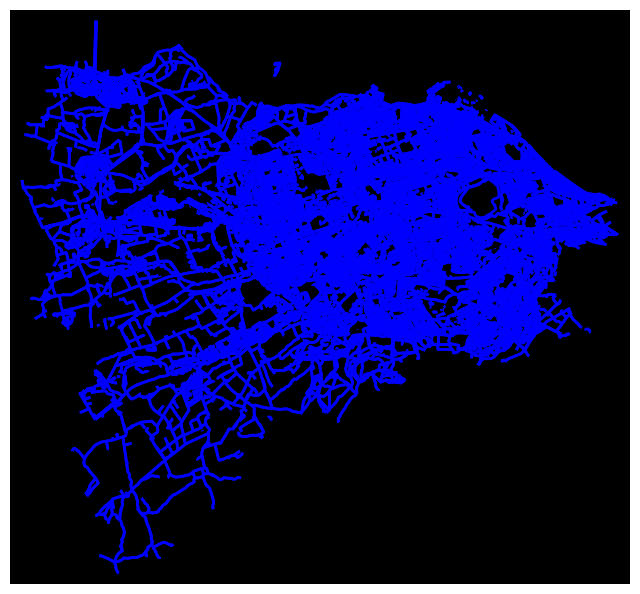

In [13]:
ox.plot.plot_graph(
    bike_graph,
    node_size=0,
    edge_color="blue",
    edge_linewidth=2,
    bgcolor="k",
    show=False,
)

In [ ]:
ox.routing.add_edge_speeds(bike_graph, fallback=10)
nx.set_edge_attributes(bike_graph, 10, "speed_kph")
ox.routing.add_edge_travel_times(bike_graph)

In [140]:
list(bike_graph.edges(data=True, keys=True))

[(363837,
  37922740,
  0,
  {'osmid': 23681871,
   'highway': 'primary',
   'lanes': '4',
   'maxspeed': '40 mph',
   'name': 'Queensferry Road',
   'ref': 'A90',
   'oneway': False,
   'reversed': False,
   'length': np.float64(76.36709594487476),
   'speed_kph': 10,
   'travel_time': 27.49215454015491}),
 (363837,
  9688802180,
  0,
  {'osmid': 23681871,
   'highway': 'primary',
   'lanes': '4',
   'maxspeed': '40 mph',
   'name': 'Queensferry Road',
   'ref': 'A90',
   'oneway': False,
   'reversed': True,
   'length': np.float64(46.456581493564876),
   'speed_kph': 10,
   'travel_time': 16.724369337683353}),
 (363837,
  31100731,
  0,
  {'osmid': 1054291056,
   'highway': 'service',
   'oneway': True,
   'reversed': False,
   'length': np.float64(15.04143330474934),
   'speed_kph': 10,
   'travel_time': 5.414915989709762}),
 (363900,
  363913,
  0,
  {'osmid': 379435998,
   'access': 'no',
   'highway': 'service',
   'lanes': '3',
   'maxspeed': '50 mph',
   'name': 'Queensferry C

In [141]:
osm_lookup = {}
for u, v, k, data in list(bike_graph.edges(data=True, keys=True)):
    if type(data["osmid"]) == int:
        osm_lookup[data["osmid"]] = (u, v, k)
    else:
        for _id in data["osmid"]:
            osm_lookup[_id] = (u, v, k)

In [142]:
osm_lookup

{23681871: (9688802180, 606059, 0),
 1054291056: (363837, 31100731, 0),
 379435998: (363900, 363913, 0),
 446889122: (363906, 12109321361, 0),
 4042540: (363913, 10752101882, 0),
 364286717: (1972734631, 363917, 0),
 184800709: (363913, 853841078, 0),
 333451927: (363913, 853841078, 0),
 1209768880: (602096, 349922464, 0),
 1111387553: (602096, 349922464, 0),
 32679322: (602096, 349922464, 0),
 32679323: (602096, 349922464, 0),
 32679321: (602101, 602103, 0),
 1209554692: (602101, 602103, 0),
 4273407: (602101, 602103, 0),
 1111387552: (349922467, 602101, 0),
 1214098120: (11415370419, 2582371390, 0),
 1126052831: (602103, 11415370419, 0),
 1209554693: (602103, 602096, 0),
 116952785: (12351408880, 12239926535, 0),
 4394808: (12030104568, 7526418925, 0),
 1126052832: (602123, 475887273, 0),
 161419822: (602123, 475887273, 0),
 161419823: (602123, 475887273, 0),
 4394812: (2144758377, 602253, 0),
 161419824: (602126, 602116, 0),
 1111387554: (602126, 602116, 0),
 46158627: (602126, 6021

In [143]:
cycleways.index

Index([   2954015,    2956326,    2956327,    2956342,    3017254,    3017282,
          3708885,    3908325,    3993982,    3993984,
       ...
       1366378625, 1368189471, 1369398701, 1369406250, 1373662356, 1373662358,
       1373662364, 1373662367, 1374528470, 1375077419],
      dtype='int64', name='id', length=3475)

In [217]:
# using higher speed as a hack to give preference to cycleways
speedy_routes = {x: 20 for x in cycleways.index.to_series().map(osm_lookup).dropna()}

In [218]:
nx.set_edge_attributes(bike_graph, speedy_routes, "speed_kph")
ox.routing.add_edge_travel_times(bike_graph)

In [184]:
ox.geocode("22 ashville terrace, edinburgh, scotland")

(55.9666761, -3.1629403)

In [223]:
home = ox.geocode("22 ashville terrace, edinburgh, scotland")

destinations = dict(
    work = ox.geocode("codebase, edinburgh, scotland"),
    alien_bloc = ox.geocode("alien bloc, edinburgh, scotland"),
    alien_rock = ox.geocode("alien rock, edinburgh, scotland"),
    climbing_hangar = ox.geocode("climbing hangar, edinburgh, scotland"),
    eica_ratho = ox.geocode("eica ratho, edinburgh, scotland"),
    stockbridge = ox.geocode("stockbridge, edinburgh, scotland"),
    western_general = ox.geocode("western general hospital, edinburgh, scotland"),
)

In [203]:
home_node = ox.distance.nearest_nodes(
    bike_graph,
    home[1],
    home[0],
)

In [224]:
destination_coords = np.array(list(destinations.values()))
destination_nodes = ox.distance.nearest_nodes(bike_graph, destination_coords[:, 1], destination_coords[:, 0])
destination_nodes = dict(zip(destinations.keys(), destination_nodes))

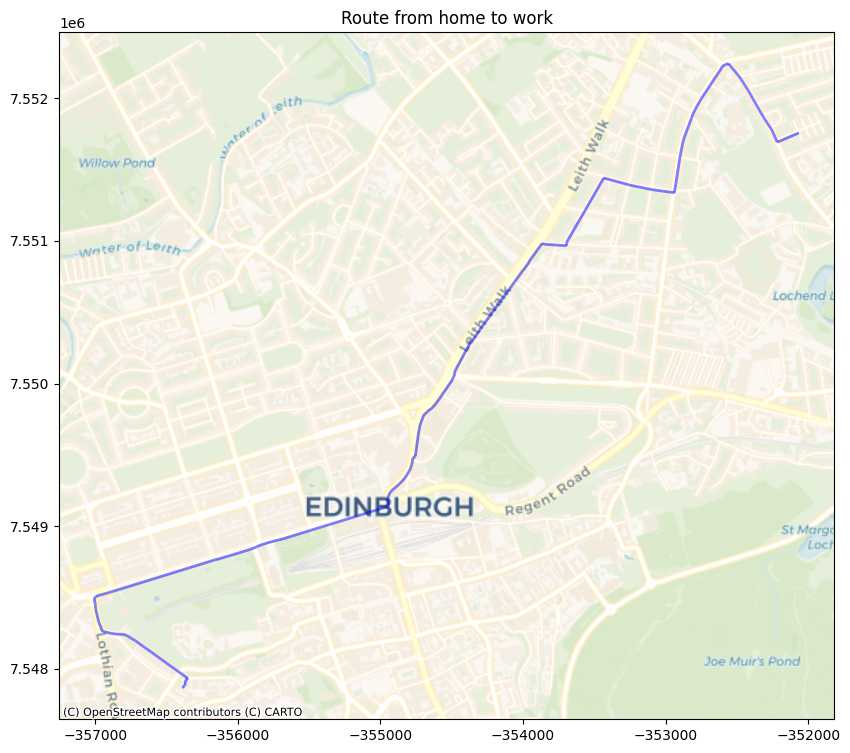

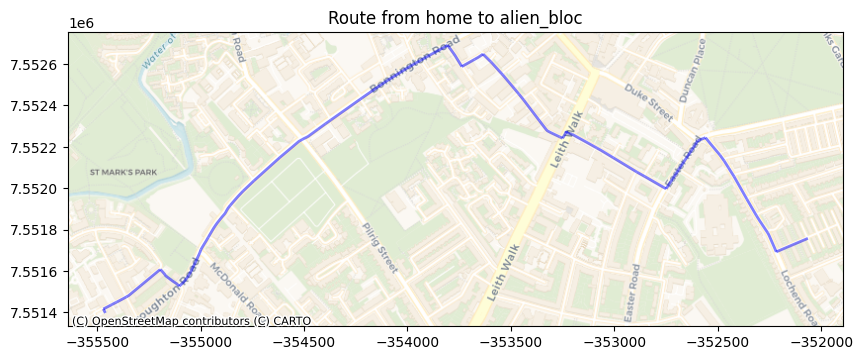

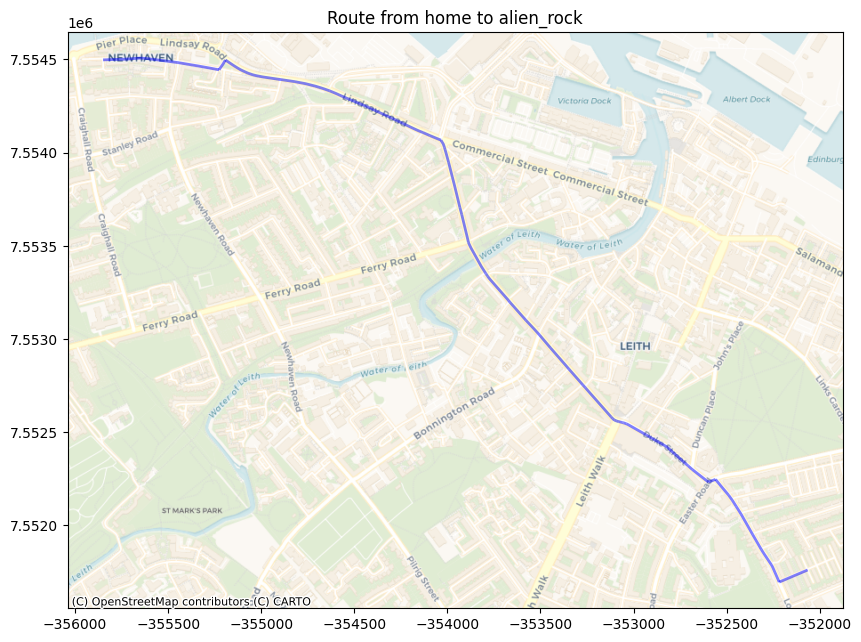

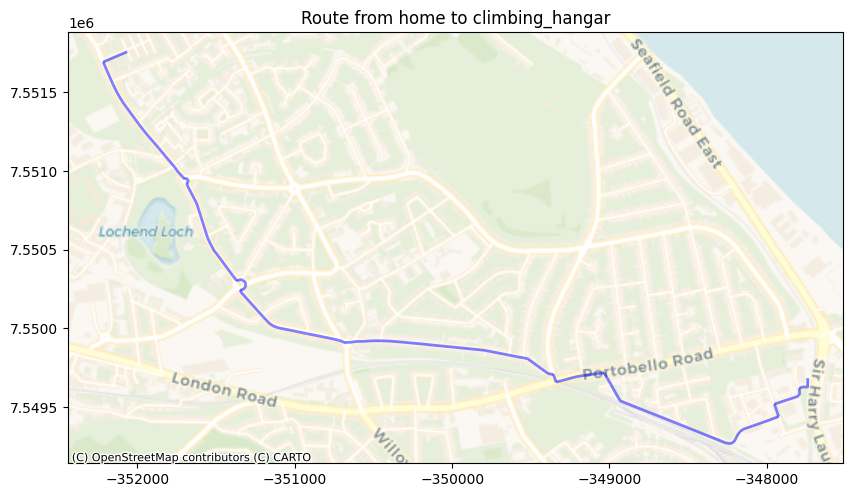

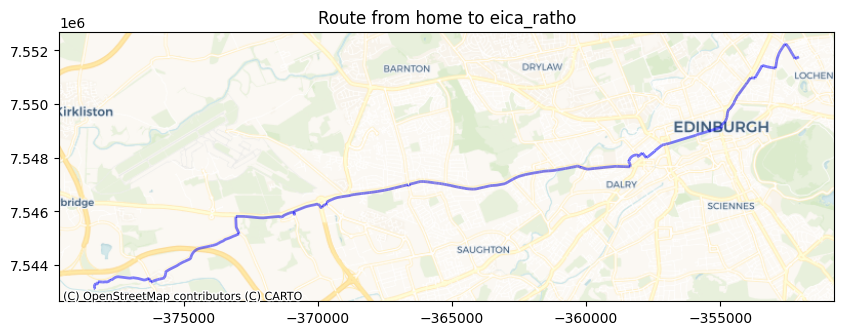

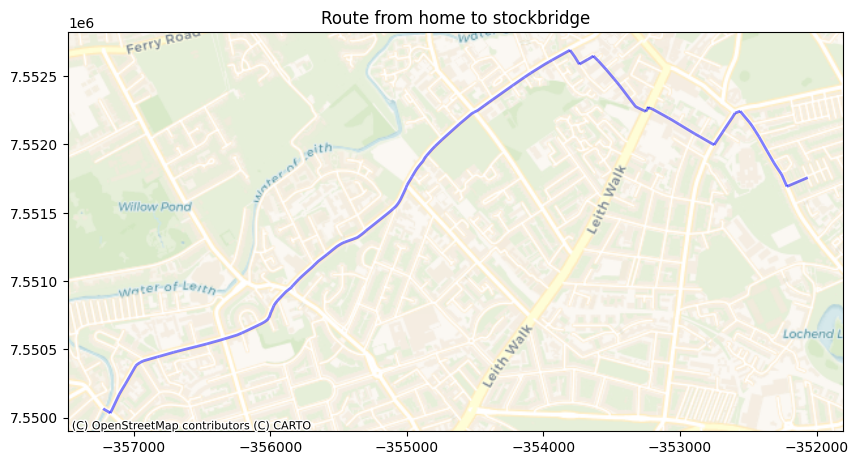

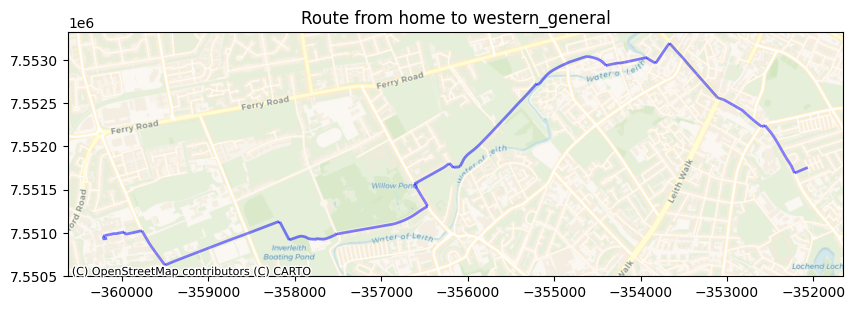

In [225]:
for label, dest_node in destination_nodes.items():
    route = ox.routing.shortest_path(
        bike_graph,
        int(home_node),
        int(dest_node),
        weight="travel_time",
    )

    ax = ox.routing.route_to_gdf(bike_graph, route).to_crs(epsg=web_mercartor_crs).plot(figsize=(10, 10), color="blue", alpha=0.5, linewidth=2)
    cx.add_basemap(ax, crs=f"EPSG:{web_mercartor_crs}", source=cx.providers.CartoDB.Voyager)
    ax.set_title(f"Route from home to {label}")
    plt.show()

In [ ]:
# Main thing - following of bike lanes - just off road?
# DONE

# Things to add in:
# Elevation effect
# adding preferences for given cycleways and just following those where possible?